change a little bit and practice and other stuff. 

I choose to check the identification if a shelf is empty or not

In [3]:
import duckduckgo_search
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(duckduckgo_search.DDGS().images(term, max_results=max_images)).itemgot('image')

In [8]:
urls = search_images('real nearly empty consumer goods shelf photos', max_images=1)
urls[0]

Searching for 'real nearly empty consumer goods shelf photos'


'https://c8.alamy.com/comp/2B799X8/nearly-empty-shelves-in-a-supermarket-grocery-store-in-the-tissue-box-aisle-as-coronavirus-causes-fear-and-panic-2B799X8.jpg'

In [9]:

urls = search_images('real consumer goods shelf photos', max_images=1)
urls[0]

Searching for 'real consumer goods shelf photos'


'https://thumbs.dreamstime.com/z/neat-shelves-goods-chinese-supermarkets-neatly-arranged-shelves-supermarkets-132119102.jpg'

c:\Users\IM_py\anaconda3\lib\asyncio\events.py:80: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)


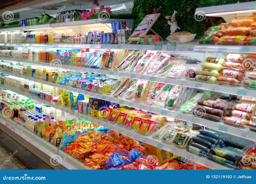

In [10]:
from fastdownload import download_url
dest = 'full_shelf.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'real nearly empty consumer goods shelf photos'


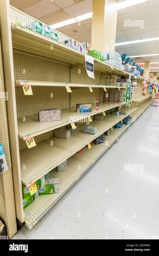

In [11]:
download_url(search_images('real nearly empty consumer goods shelf photos', max_images=1)[0], 'nearly_emp_shelf.jpg', show_progress=False)
Image.open('nearly_emp_shelf.jpg').to_thumb(256,256)

In [12]:
searches = 'real nearly empty ','real'
path = Path('full_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} consumer goods shelf photos'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'real nearly empty  consumer goods shelf photos'


c:\Users\IM_py\anaconda3\lib\asyncio\events.py:80: UserWarning: Curlm alread closed! quitting from process_data
  self._context.run(self._callback, *self._args)


FileNotFoundError: [WinError 3] O sistema não pode encontrar o caminho especificado: 'full_or_not\\real nearly empty '

The pictures are stored as numbers based on the rgb of each pixel.

In [9]:
failed = verify_images(get_image_files(path = path))
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

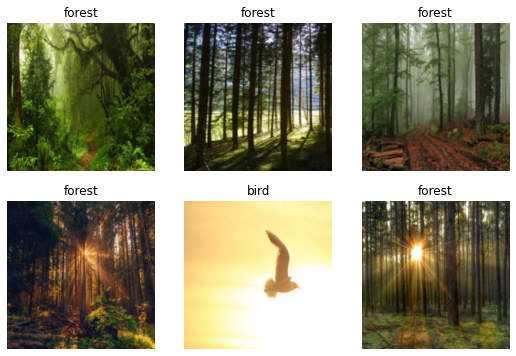

In [10]:
dls = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192,method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\IM_py/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 39.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.338329,1.902667,0.696970,00:12


epoch,train_loss,valid_loss,error_rate,time
0,1.237797,0.883278,0.303030,00:15
1,0.838551,0.319026,0.090909,00:15
2,0.584449,0.163927,0.030303,00:15


In [12]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9771
